# Models

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1.keras.optimizers import Adam
from tensorflow.compat.v1.ragged import RaggedTensorValue


In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
x = df.drop("Yield", axis=1)
y = df[["Yield"]]

In [4]:
x.head()

,Year,Area,Production,red soil,mountain soil,alluvial soil,clayey soil,laterite soil,loamy soil,sandy soil,...,District_Solapur,District_Unnao,Crop_Maize,Crop_Rice,Crop_Sugarcane,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Whole year
0,2012,45000,91900,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2012,7500,4600,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2012,6100,1100,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2012,14700,24800,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2012,38900,46100,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [5]:
y.head()

,Yield
0,2.042222
1,0.613333
2,0.180328
3,1.687075
4,1.185090


In [6]:
len(y)

734

In [7]:
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x_scaled = std.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(x_test)

# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_squared = r2_score(y_test, lr_preds)
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R^2: {lr_squared}")

Linear Regression RMSE: 0.23422016694077186
Linear Regression MAE: 0.10591620970555297
Linear Regression MSE: 0.05485908660176304
Linear Regression R^2: 0.9329947051954584


In [10]:
# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(x_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(x_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_squared = r2_score(y_test, rf_preds)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_squared}")

C:\Users\vansi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest RMSE: 0.14460456158988688
Random Forest MAE: 0.03609215618887988
Random Forest MSE: 0.02091047923260339
Random Forest R^2: 0.9744597857478763


In [11]:
# Initialize XGBoost model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test set
xgb_preds = xgb_model.predict(x_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_squared = r2_score(y_test, xgb_preds)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost R^2: {xgb_squared}")

XGBoost RMSE: 0.14952885286721027
XGBoost MAE: 0.034574893766597704
XGBoost MSE: 0.022358877839783818
XGBoost R^2: 0.9726907009584571


In [30]:
# Assuming you have reshaped your data for CNN
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the model
cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Predict on test set
cnn_preds = cnn_model.predict(x_test_cnn).flatten()

# Evaluate
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_preds))
cnn_mae = mean_absolute_error(y_test, cnn_preds)
cnn_mse = mean_squared_error(y_test, cnn_preds)
cnn_squared = r2_score(y_test, cnn_preds)
print(f"CNN RMSE: {cnn_rmse}")
print(f"CNN MAE: {cnn_mae}")
print(f"CNN MSE: {cnn_mse}")
print(f"CNN R^2: {cnn_squared}")

Epoch 1/10
19/19 [==============================] - 0s 7ms/step - loss: 0.7133 - val_loss: 0.1856
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 0.1576 - val_loss: 0.0538
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0752 - val_loss: 0.0248
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0412 - val_loss: 0.0174
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0269 - val_loss: 0.0212
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.0242
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.0229
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.0224
Epoch 9/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 0.0228
Epoch 10/10
5/5 [==============================] - 0s 0s/step
CNN RMSE: 0.19697413454972013
CNN MAE: 0.085398951014116

In [13]:
# Initialize LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Predict on test set
lstm_preds = lstm_model.predict(x_test_cnn).flatten()

# Evaluate
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_squared = r2_score(y_test, lstm_preds)
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM MSE: {lstm_mse}")
print(f"LSTM R^2: {lstm_squared}")

Epoch 1/10
19/19 [==============================] - 1s 24ms/step - loss: 1.0353 - val_loss: 0.7768
Epoch 2/10
19/19 [==============================] - 0s 14ms/step - loss: 0.9704 - val_loss: 0.7178
Epoch 3/10
19/19 [==============================] - 0s 13ms/step - loss: 0.8979 - val_loss: 0.6433
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 45876441513984.0000 - val_loss: 0.6196
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.8309 - val_loss: 0.6375
Epoch 6/10
19/19 [==============================] - 0s 13ms/step - loss: 0.8385 - val_loss: 0.6381
Epoch 7/10
19/19 [==============================] - 0s 16ms/step - loss: 0.8382 - val_loss: 0.6371
Epoch 8/10
19/19 [==============================] - 0s 15ms/step - loss: 0.8366 - val_loss: 0.6356
Epoch 9/10
19/19 [==============================] - 0s 14ms/step - loss: 0.8349 - val_loss: 0.6341
Epoch 10/10
5/5 [==============================] - 0s 4ms/step
LSTM RMSE: 0.795463358103686
LSTM

In [14]:
# Initialize DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1))

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse')

# Train the model
dnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Predict on test set
dnn_preds = dnn_model.predict(x_test).flatten()

# Evaluate
dnn_rmse = np.sqrt(mean_squared_error(y_test, dnn_preds))
dnn_mae = mean_absolute_error(y_test, dnn_preds)
dnn_mse = mean_squared_error(y_test, dnn_preds)
dnn_squared = r2_score(y_test, dnn_preds)
print(f"DNN RMSE: {dnn_rmse}")
print(f"DNN MAE: {dnn_mae}")
print(f"DNN MSE: {dnn_mse}")
print(f"DNN R^2: {dnn_squared}")

Epoch 1/10
19/19 [==============================] - 0s 6ms/step - loss: 1.0682 - val_loss: 0.6103
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 0.5465 - val_loss: 0.3402
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.3175 - val_loss: 0.1987
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1988 - val_loss: 0.1205
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.0952
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1061 - val_loss: 0.0792
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0842 - val_loss: 0.0630
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0650 - val_loss: 0.0575
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0457
Epoch 10/10
5/5 [==============================] - 0s 0s/step
DNN RMSE: 0.20825834296158874
DNN MAE: 0.133970398222567

In [15]:
# Hybrid Model
hybrid_preds = (rf_preds + xgb_preds + lstm_preds) / 3

# Evaluate
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_preds))
hybrid_mae = mean_absolute_error(y_test, hybrid_preds)
hybrid_mse = mean_squared_error(y_test, hybrid_preds)
hybrid_squared = r2_score(y_test, hybrid_preds)
print(f"Hybrid Model RMSE: {hybrid_rmse}")
print(f"Hybrid Model MAE: {hybrid_mae}")
print(f"Hybrid Model MSE: {hybrid_mae}")
print(f"Hybrid Model R^2: {hybrid_squared}")

Hybrid Model RMSE: 0.2580477219791555
Hybrid Model MAE: 0.10997720094387636
Hybrid Model MSE: 0.10997720094387636
Hybrid Model R^2: 0.9186681578750779


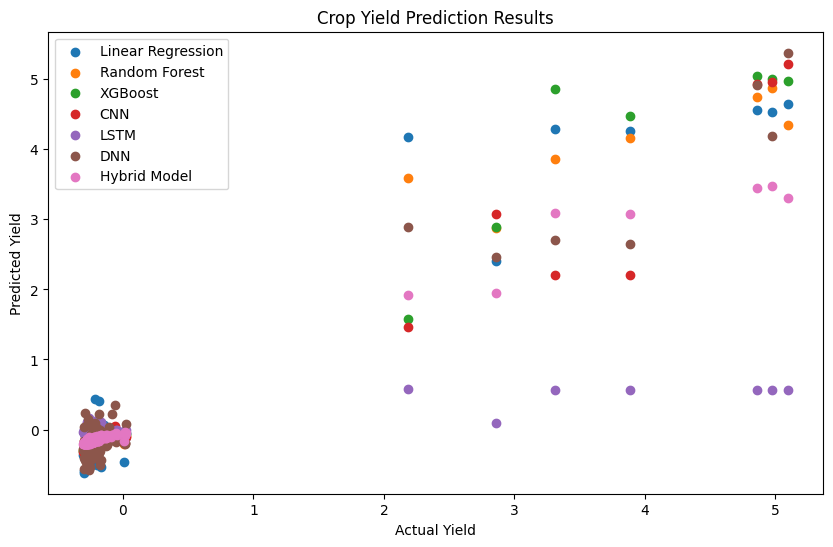

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_preds, label='Linear Regression', marker='o')
plt.scatter(y_test, rf_preds, label='Random Forest', marker='o')
plt.scatter(y_test, xgb_preds, label='XGBoost', marker='o')
plt.scatter(y_test, cnn_preds, label='CNN', marker='o')
plt.scatter(y_test, lstm_preds, label='LSTM', marker='o')
plt.scatter(y_test, dnn_preds, label='DNN', marker='o')
plt.scatter(y_test, hybrid_preds, label='Hybrid Model', marker='o')

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Crop Yield Prediction Results')
plt.legend()
plt.show()

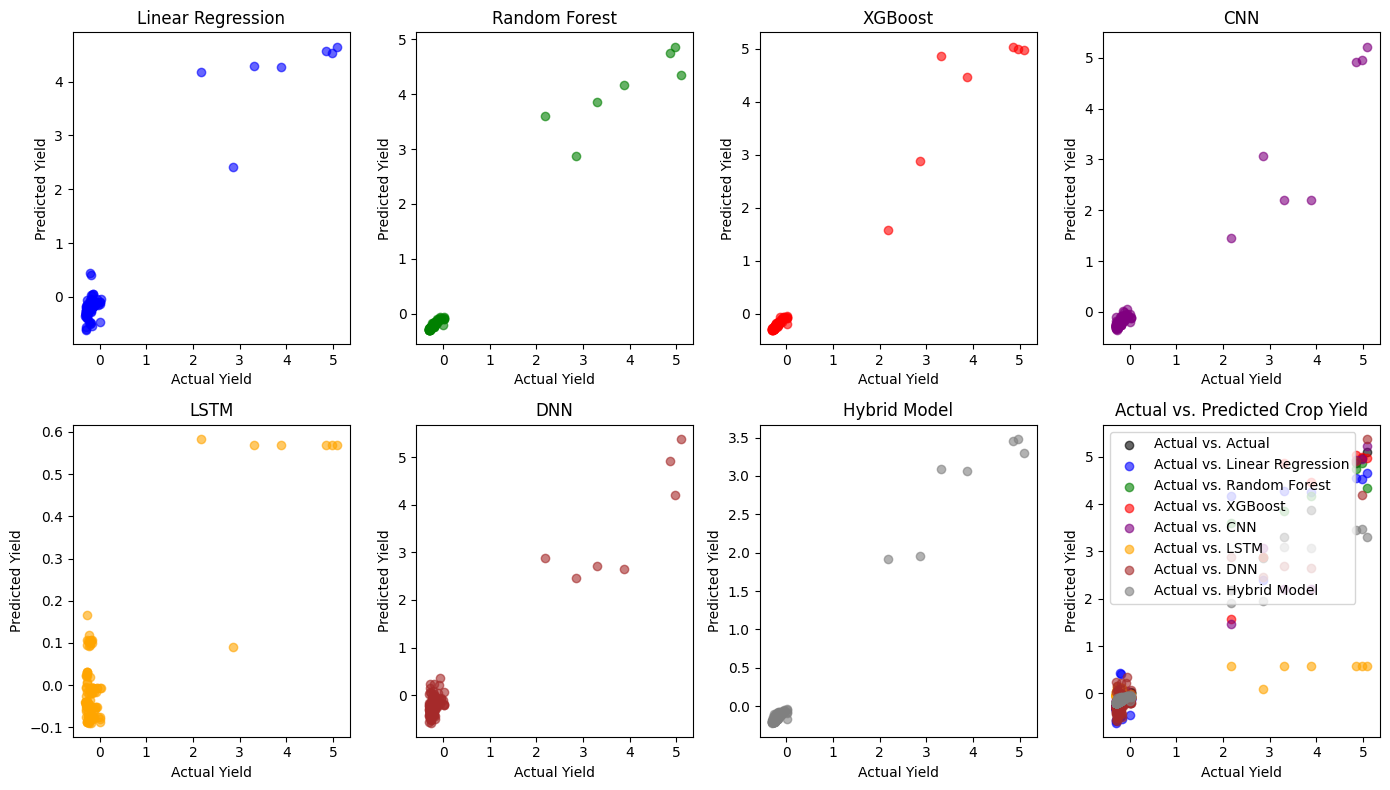

In [17]:
# Visualize Results
plt.figure(figsize=(14, 8))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6)
plt.title('Linear Regression')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Random Forest
plt.subplot(2, 4, 2)
plt.scatter(y_test, rf_preds, color='green', alpha=0.6)
plt.title('Random Forest')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# XGBoost
plt.subplot(2, 4, 3)
plt.scatter(y_test, xgb_preds, color='red', alpha=0.6)
plt.title('XGBoost')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# CNN
plt.subplot(2, 4, 4)
plt.scatter(y_test, cnn_preds, color='purple', alpha=0.6)
plt.title('CNN')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# LSTM
plt.subplot(2, 4, 5)
plt.scatter(y_test, lstm_preds, color='orange', alpha=0.6)
plt.title('LSTM')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# DNN
plt.subplot(2, 4, 6)
plt.scatter(y_test, dnn_preds, color='brown', alpha=0.6)
plt.title('DNN')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Hybrid Model
plt.subplot(2, 4, 7)
plt.scatter(y_test, hybrid_preds, color='gray', alpha=0.6)
plt.title('Hybrid Model')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Actual vs. Predicted
plt.subplot(2, 4, 8)
plt.scatter(y_test, y_test, color='black', alpha=0.6, label='Actual vs. Actual')
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6, label='Actual vs. Linear Regression')
plt.scatter(y_test, rf_preds, color='green', alpha=0.6, label='Actual vs. Random Forest')
plt.scatter(y_test, xgb_preds, color='red', alpha=0.6, label='Actual vs. XGBoost')
plt.scatter(y_test, cnn_preds, color='purple', alpha=0.6, label='Actual vs. CNN')
plt.scatter(y_test, lstm_preds, color='orange', alpha=0.6, label='Actual vs. LSTM')
plt.scatter(y_test, dnn_preds, color='brown', alpha=0.6, label='Actual vs. DNN')
plt.scatter(y_test, hybrid_preds, color='gray', alpha=0.6, label='Actual vs. Hybrid Model')

plt.title('Actual vs. Predicted Crop Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.tight_layout()
plt.show()

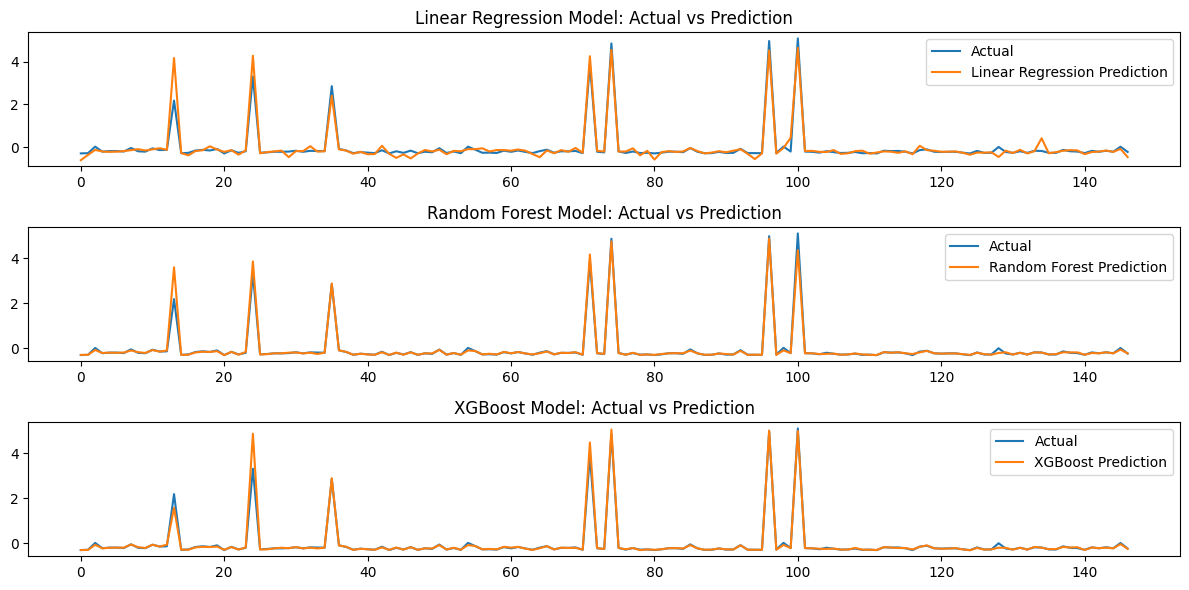

In [18]:
# Plotting Linear Regression predictions
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(y_test_scaled, label='Actual')
plt.plot(lr_preds, label='Linear Regression Prediction')
plt.title('Linear Regression Model: Actual vs Prediction')
plt.legend()

# Plotting Random Forest predictions
plt.subplot(3, 1, 2)
plt.plot(y_test_scaled, label='Actual')
plt.plot(rf_preds, label='Random Forest Prediction')
plt.title('Random Forest Model: Actual vs Prediction')
plt.legend()

# Plotting XGBoost predictions
plt.subplot(3, 1, 3)
plt.plot(y_test_scaled, label='Actual')
plt.plot(xgb_preds, label='XGBoost Prediction')
plt.title('XGBoost Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

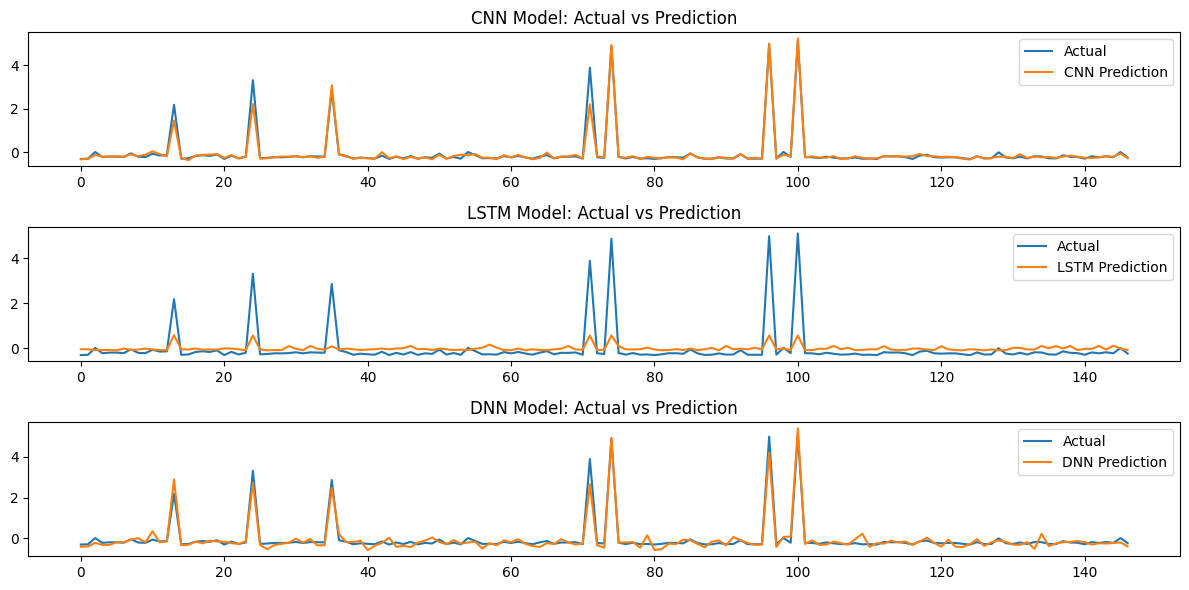

In [19]:
# Plotting CNN predictions
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(y_test_scaled, label='Actual')
plt.plot(cnn_preds, label='CNN Prediction')  # Assuming cnn_pred is a 2D array, we select the first column
plt.title('CNN Model: Actual vs Prediction')
plt.legend()

# Plotting LSTM predictions
plt.subplot(3, 1, 2)
plt.plot(y_test_scaled, label='Actual')
plt.plot(lstm_preds, label='LSTM Prediction')  # Assuming lstm_pred is a 2D array, we select the first column
plt.title('LSTM Model: Actual vs Prediction')
plt.legend()

# Plotting DNN predictions
plt.subplot(3, 1, 3)
plt.plot(y_test_scaled, label='Actual')
plt.plot(dnn_preds, label='DNN Prediction')
plt.title('DNN Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

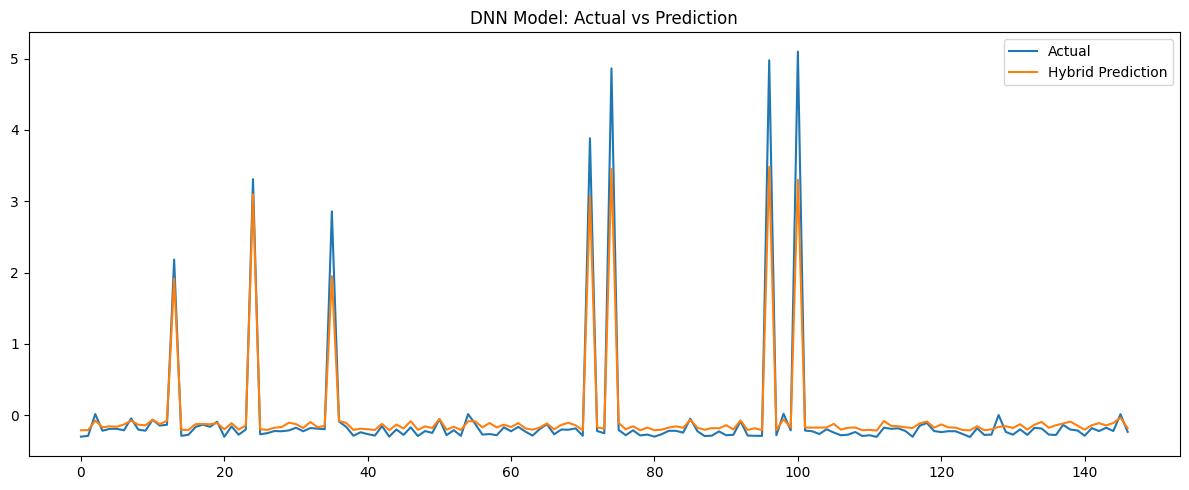

In [20]:
# Plotting Hybrid predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(hybrid_preds, label='Hybrid Prediction')
plt.title('DNN Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Flatten the arrays to ensure they are 1-dimensional
lr_preds_flat = lr_preds.flatten()
rf_preds_flat = rf_preds.flatten()
xgb_preds_flat = xgb_preds.flatten()
cnn_preds_flat = cnn_preds.flatten()
lstm_preds_flat = lstm_preds.flatten()
dnn_preds_flat = dnn_preds.flatten()
hybrid_preds_flat = hybrid_preds.flatten()

In [22]:
print("Shapes of prediction arrays:")
print("Linear Regression:", lr_preds_flat.shape)
print("Random Forest:", rf_preds_flat.shape)
print("XGBoost:", xgb_preds_flat.shape)
print("CNN:", cnn_preds_flat.shape)
print("LSTM:", lstm_preds_flat.shape)
print("DNN:", dnn_preds_flat.shape)
print("Hybrid Model:", hybrid_preds_flat.shape)


Shapes of prediction arrays:
Linear Regression: (147,)
Random Forest: (147,)
XGBoost: (147,)
CNN: (147,)
LSTM: (147,)
DNN: (147,)
Hybrid Model: (147,)


In [23]:
print("Shape of y_test:", y_test.shape)

Shape of y_test: (147, 1)


In [24]:
# Flatten y_test to make it 1-dimensional
y_test_flat = y_test.flatten()

# Creating a DataFrame with model predictions and evaluation metrics
df_results = pd.DataFrame({
    'Actual': y_test_flat,
    'Linear Regression': lr_preds_flat,
    'Random Forest': rf_preds_flat,
    'XGBoost': xgb_preds_flat,
    'CNN': cnn_preds_flat,
    'LSTM': lstm_preds_flat,
    'DNN': dnn_preds_flat,
    'Hybrid Model': hybrid_preds_flat
})


In [25]:
# Adding evaluation metrics to the DataFrame
df_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'CNN', 'LSTM', 'DNN', 'Hybrid Model'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse, cnn_rmse, lstm_rmse, dnn_rmse, hybrid_rmse],
    'MAE': [lr_mae, rf_mae, xgb_mae, cnn_mae, lstm_mae, dnn_mae, hybrid_mae],
    'MSE': [lr_mse, rf_mse, xgb_mse, cnn_mse, lstm_mse, dnn_mse, hybrid_mse],
    'R^2': [lr_squared, rf_squared, xgb_squared, cnn_squared, lstm_squared, dnn_squared, hybrid_squared]
})

df_metrics.set_index('Model', inplace=True)

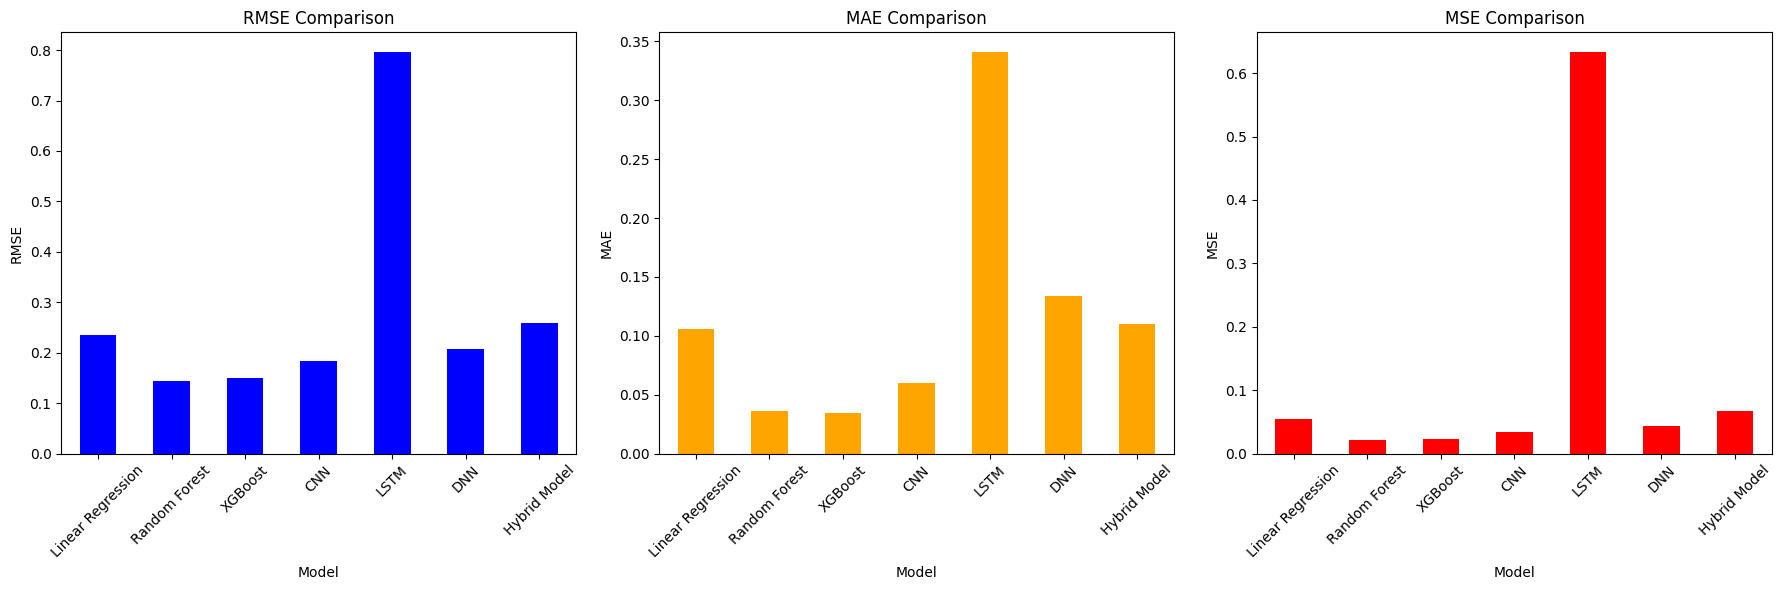

In [26]:
# Plotting evaluation metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# RMSE Comparison
df_metrics['RMSE'].plot(kind='bar', color='blue', ax=axs[0], rot=45)
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE')

# MAE Comparison
df_metrics['MAE'].plot(kind='bar', color='orange', ax=axs[1], rot=45)
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('MAE')

# MSE Comparison
df_metrics['MSE'].plot(kind='bar', color='red', ax=axs[2], rot=45)
axs[2].set_title('MSE Comparison')
axs[2].set_ylabel('MSE')

plt.tight_layout()
plt.show()

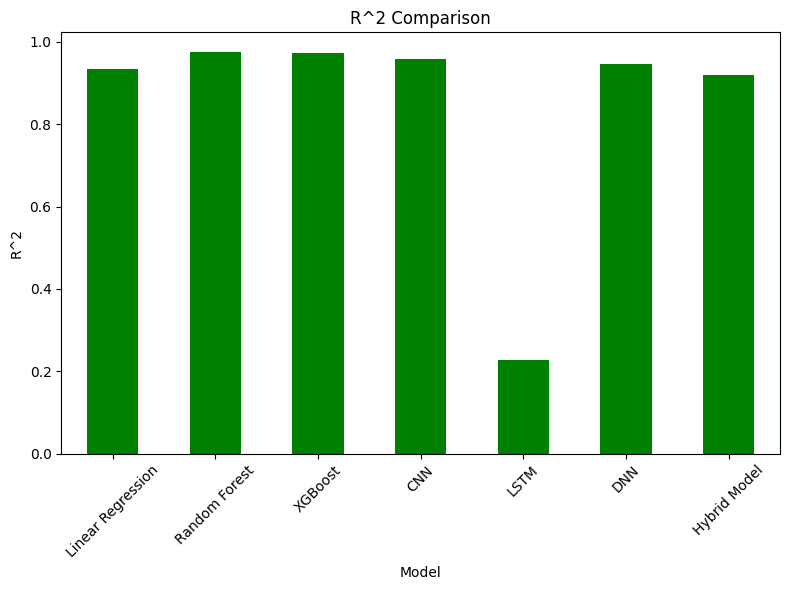

In [27]:
# Plotting R^2
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# R^2 Comparison
df_metrics['R^2'].plot(kind='bar', color='green', ax=axs, rot=45)
axs.set_title('R^2 Comparison')
axs.set_ylabel('R^2')

plt.tight_layout()
plt.show()

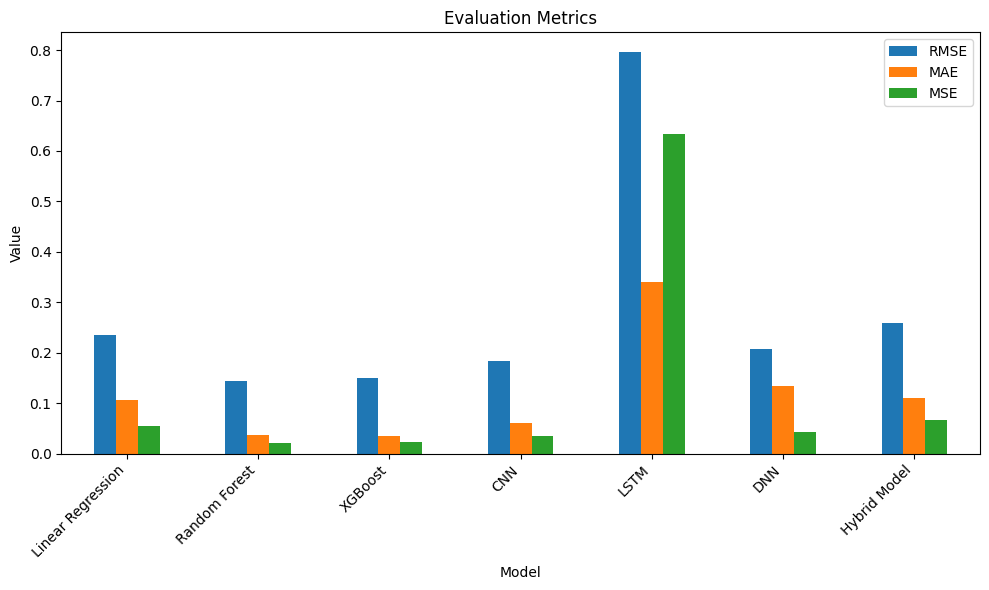

In [28]:
# Plotting only the bar plot for evaluation metrics
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Bar plot for evaluation metrics
df_metrics.plot(kind='bar', y=['RMSE', 'MAE', 'MSE'], ax=axes)
axes.set_title('Evaluation Metrics')
axes.set_ylabel('Value')
axes.set_xticklabels(df_metrics.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\vansi\AppData\Local\Temp\ipykernel_16052\696271227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='R^2', data=df_metrics.reset_index(), palette=colors)


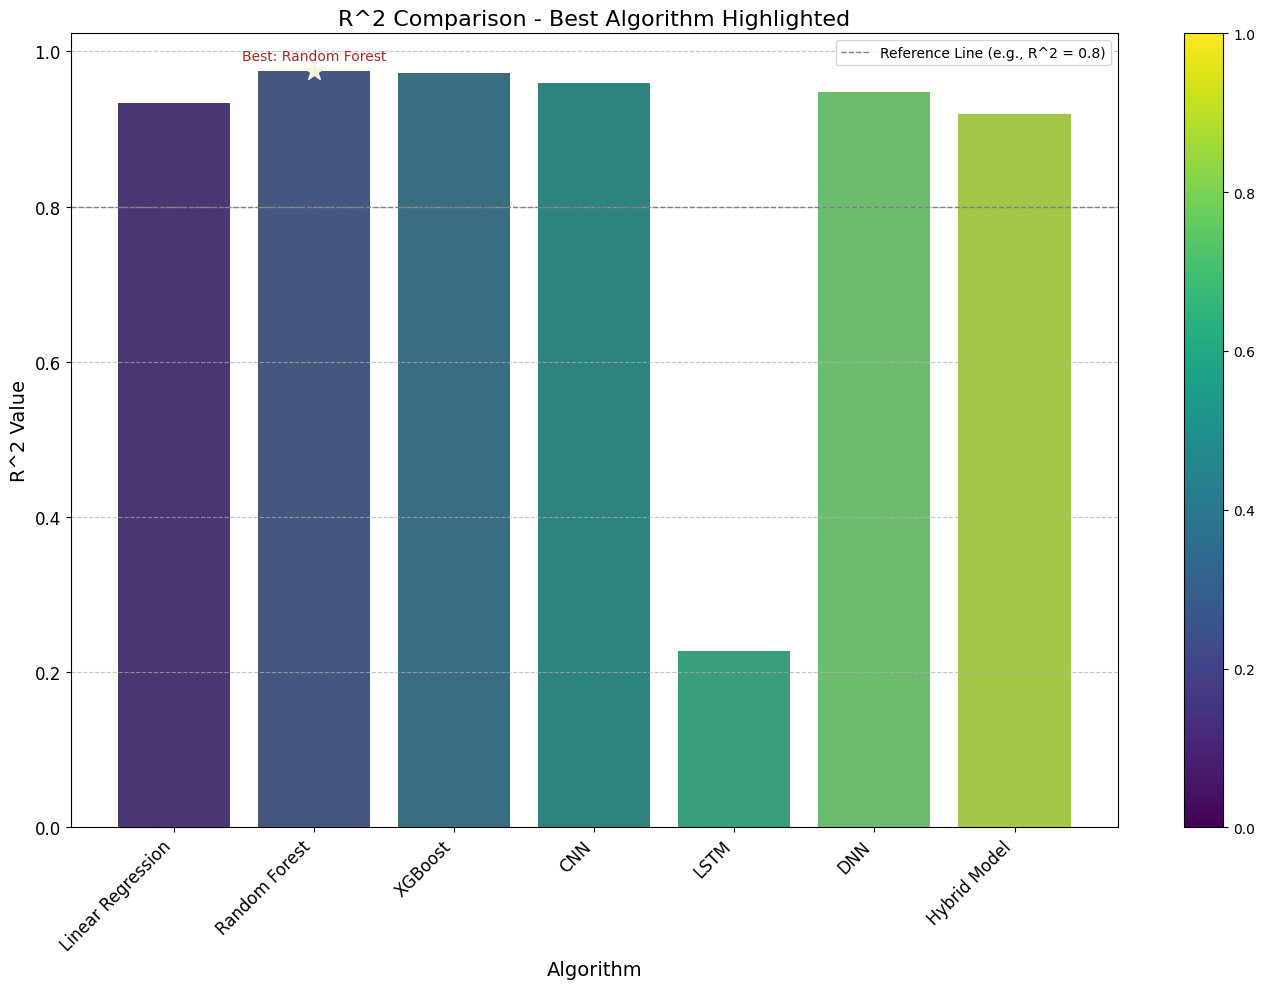

In [29]:
# Identify the best algorithm for R^2
best_algorithm_r2 = df_metrics['R^2'].idxmax()

# Set a custom color palette
colors = sns.color_palette("viridis", len(df_metrics))

# Create a bar plot for R^2
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Model', y='R^2', data=df_metrics.reset_index(), palette=colors)

# Highlight the best algorithm
best_value = df_metrics.loc[best_algorithm_r2, 'R^2']
plt.scatter(df_metrics.index.get_loc(best_algorithm_r2), best_value, color='Beige', marker='*', s=200, zorder=5)
plt.text(df_metrics.index.get_loc(best_algorithm_r2), best_value + 0.01, f'Best: {best_algorithm_r2}',
         ha='center', va='bottom', color='brown')

# Customize the plot
plt.title('R^2 Comparison - Best Algorithm Highlighted', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('R^2 Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for reference
plt.axhline(y=0.8, color='gray', linestyle='--', linewidth=1, label='Reference Line (e.g., R^2 = 0.8)')
plt.legend()

# Add a gradient color bar for better interpretation
barplot.figure.colorbar(barplot.collections[0])

plt.tight_layout()
plt.show()
